In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize
from pandas import *
# # from jupyterthemes import jtplot
# import numba as nb
import matplotlib.pyplot as plt
import matplotlib as mtp

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import signal
#%matplotlib notebook
plt.rcParams["font.size"]="20"
# plt.rcParams["font.weight"]="bold"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['figure.figsize'] = [7, 8]

In [2]:
kb = 8.617e-5
eps = [-5., -4., -3., -2., +2., +2.5, +3.]
F = np.zeros((7,7,2))
k_nuc = np.zeros((7,7,2))
for (i,e) in enumerate(eps):
    F[i,:] = np.asarray(np.loadtxt('max_free_eng_temp_'+str(e)+'.txt'))
    k_nuc[i,:,0] = F[i,:,0]
    k_nuc[i,:,1] = 1e12*np.exp(-F[i,:,1]/kb/F[i,:,0])

pe_2 = np.loadtxt('comp_2%_pe_neb.txt')
pe_3 = np.loadtxt('comp_3%_pe_neb.txt')
pe_4 = np.loadtxt('comp_4%_pe_neb.txt')
pe_5 = np.loadtxt('comp_5%_pe_neb.txt')

Eb = np.asarray([max(pe_5[:,1]), max(pe_4[:,1]), max(pe_3[:,1]), max(pe_2[:,1])]) #
T_nuc = np.asarray([150, 150, 350, 650])
nu_neb = 1./5e-9/np.exp(-np.asarray(Eb)/8.617e-5/np.asarray(T_nuc))



Tm_comp = np.loadtxt('Tm_comp.txt')
s_2 = np.loadtxt('s_comp_2.txt')
s_3 = np.loadtxt('s_comp_3.txt')
s_4 = np.loadtxt('s_comp_4.txt')
s_5 = np.loadtxt('s_comp_5.txt')

S0 = np.asarray([s_5[np.argmax(pe_5[:,1])], s_4[np.argmax(pe_4[:,1])], s_3[np.argmax(pe_3[:,1])], s_2[np.argmax(pe_2[:,1])]])

T = np.arange(200,680)
k_pred = 1.43e32*np.exp(-3.49/kb/T)

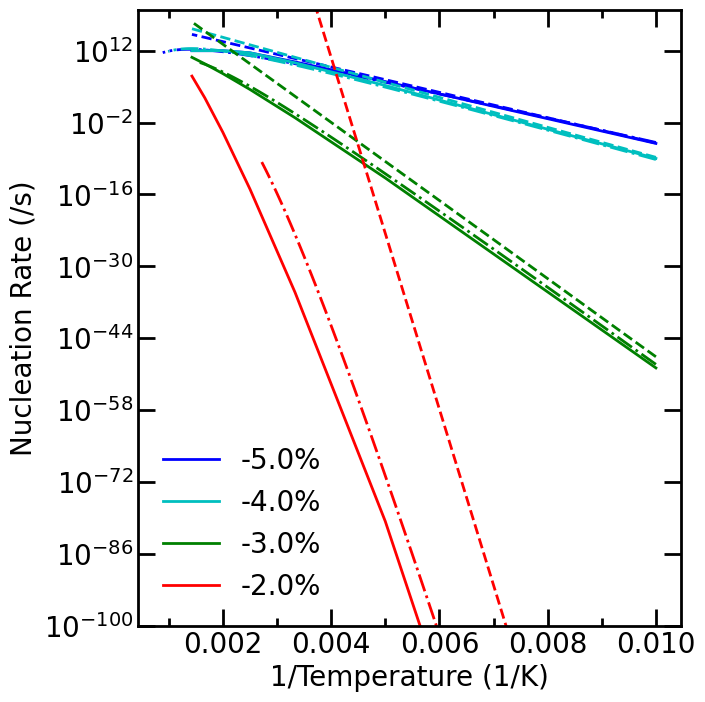

In [3]:
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(1./500))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(1e5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 12, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'minor')

colors = ['b', 'c', 'g', 'r']
for i in range(7):
    if eps[i]>0:
        mark = 'o--'
    else:
        mark = '-'
        k_htst = 1e12*np.exp(S0[i]/kb)*np.exp(-Eb[i]/kb/F[i,:,0])
        if i==3:
            k_htst[0] = 10**(-194.93123510311472)
            
        k_model_comp = np.loadtxt(f'analytical_rate_model_compression_{eps[i]}.txt') 
        
#         if i!=3:
        plt.semilogy(1./F[i,:,0], k_nuc[i,:,1], mark, c=colors[i], label=repr(eps[i])+'%', linewidth=2)
        plt.semilogy(1./F[i,:,0], k_htst, '--', c=colors[i], linewidth=2)
        plt.semilogy(k_model_comp[:,0], k_model_comp[:,1], '-.', c=colors[i], linewidth=2)
        
# plt.semilogy(1./T, k_pred, 'm,-')
# plt.annotate('$k_{650}$ = 1.43x$10^{32}$'+r'exp$ -\frac{3.49}{K_BT}$', (.002, 1e-64), color='m')
# plt.plot(1./650*np.ones((10,)), 10**np.linspace(-200, 4, 10), 'm--')
# plt.annotate(r'$\frac{1}{T}$ = $\frac{1}{650K}$', (.0018, 1e-85), color='m')

plt.legend(frameon=False)
plt.ylim(1e-100,1e20)
# plt.ylim(1e-5,1e13)
# plt.xlim(0,.01)

plt.rcParams['axes.linewidth'] = 3
plt.xlabel('1/Temperature (1/K)')
plt.ylabel('Nucleation Rate (/s)')
plt.savefig('nucleation_rate_Temp_compr.png', bbox_inches='tight', dpi=600)
# plt.savefig('Fig_4.pdf', bbox_inches='tight', dpi=600)
# plt.savefig('zoom_in_nucleation_rate_Temp_compr.png', bbox_inches='tight', dpi=600)

In [ ]:
k_htst

In [ ]:
eps

In [ ]:
pe_2 = np.loadtxt('tens_2%_neb.txt')
pe_2_5 = np.loadtxt('tens_2.5%_neb.txt')
pe_3 = np.loadtxt('tens_3%_neb.txt')

Eb = np.asarray([max(pe_2[:,1]), max(pe_2_5[:,1]), max(pe_3[:,1])]) #, max(pe_2[:,1])]) #

s_2 = np.loadtxt('s_tens_2.txt')
s_2_5 = np.loadtxt('s_tens_2.5.txt')
s_3 = np.loadtxt('s_tens_3.txt')

S0 = np.asarray([s_2[np.argmax(pe_2[:,1])], s_2_5[np.argmax(pe_2_5[:,1])], s_3[np.argmax(pe_3[:,1])]])
# T_nuc = np.asarray([150, 150, 350, 650])
# nu_neb = 1./5e-9/np.exp(-np.asarray(Eb)/8.617e-5/np.asarray(T_nuc))

# def k_htst(nu, T, dE):
#     return nu*np.exp(-dE/kb/T)

In [ ]:
# For tension 5% case:
F5 = np.loadtxt('max_free_eng_temp_5.txt')
knuc_5 = 1e12*np.exp(-F5[:,1]/kb/F5[:,0])


fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(1./500))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(1e5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')

colors = ['b', 'orange', 'g']
for i in range(7):
    if eps[i]>0:
        mark = '-'
        
        k_model_tens = np.loadtxt(f'analytical_rate_model_tension_{eps[i]}.txt') 
        
        plt.semilogy(1./F[i,:,0], k_nuc[i,:,1], mark, c=colors[i-4], label=repr(eps[i])+'%')
        plt.semilogy(1./F[i,:,0], 1e12*np.exp(S0[i-4]/kb)*np.exp(-Eb[i-4]/kb/F[i,:,0]), '--', c=colors[i-4])
        plt.semilogy(k_model_tens[:,0], k_model_tens[:,1], '-.', c=colors[i-4])
    else:
        mark = 'o-'
# plt.semilogy(1/F5[:10,0], knuc_5[:10], '-', c='m', label='5%')
# plt.semilogy(1/np.linspace(100,1000), 1e12*np.ones(50), '--', c='m', label='5%')             

plt.legend(frameon=False)
# plt.ylim(1e-40,1e25)
plt.xlabel('1/Temperature (1/K)')
plt.ylabel('Nucleation Rate (/s)')
plt.savefig('nucleation_rate_Temp_tens.png', bbox_inches='tight', dpi=600)
# plt.savefig('Fig_4.pdf', bbox_inches='tight', dpi=600)

In [ ]:
F[:,:,0]

In [ ]:
## check for 2% compression case ##
i = 3
k = np.log10(k_htst(nu_neb[i], F[i,:,0], Eb[i]))
k[0] = -282
k_an = np.log10(k_nuc[i,:,1])
plt.plot(1./F[i,:,0], k, 'r--')
plt.plot(1./F[i,:,0], k_an, 'ro-')
plt.xlabel('1/Temperature (1/K)')
plt.ylabel('Log Rate (1/s)')
plt.savefig('rate_2%_comp_case.png')

In [ ]:

plt.semilogy(1/F5[:,0], knuc_5[:], '-', c='m', label='5%')
plt.semilogy(1/np.linspace(300,500), 1e12*np.ones(50), '--', c='m', label='5%')  

In [ ]:
i=3
1e12*np.exp(-Eb[i]/kb/F[i,:,0])

In [ ]:
eps[i]

In [ ]:
i = 3
k_htst = 1e12*np.exp(S0[i]/kb)*np.exp(-Eb[i]/kb/F[i,:,0])
if i==3:
    k_htst[0] = 10**(-194.93123510311472)


In [ ]:
(np.log(k_htst[6]) - np.log(k_htst[5]))/(1/F[i,6,0] - 1/F[i,5,0])*kb

In [ ]:
(np.log(k_nuc[i,6,1]) - np.log(k_nuc[i,5,1]))/(1/F[i,6,0] - 1/F[i,5,0])*kb

In [ ]:
Eb

In [ ]:
np.log10(k_pred)

In [ ]:
10**np.linspace(-200, 4, 10)

In [ ]:
f_test = np.array([1.03296059e+00, 1.34042576e+00, 1.69935635e+00, 2.15506390e+00,
        2.61403823e+00, 3.07301256e+00, 3.53198689e+00])

In [ ]:
1e12*np.exp(-f_test/8.617e-5/F[1,:,0])

In [ ]:
knuc_5

In [ ]:
k_htst*np.exp(-F[i,:,0]/Tm_comp[:,1])

In [ ]:
eps

In [ ]:
i=0
k_htst = 1e12*np.exp(S0[i]/kb)*np.exp(-Eb[i]/kb/F[i,:,0])

In [ ]:
k_htst*np.exp(-F[i,:,0]/Tm_comp[i,1])